В этом задании мы должны научить машину понимать тексты. В файле recs.txt находятся отзывы о разных фильмах. Наша модель машинного обучения должна проанализировать отзыв и ответить на простой вопрос: понравился ли пользователю просмотренный фильм.

Подключите необходимые для работы пакеты: pandas as pd, numpy as np, nltk, re, все функции из sklearn

In [15]:
import pandas as pd
from sklearn import *
import nltk
import re
import numpy as np

Увеличьте ширину выводимой информации в DataFrame (на это понадобится для показа текстов отзывав):
pd.set_option('max_colwidth',600)

In [16]:
pd.set_option('max_colwidth', 600)

Прочтите данные из файла recs.txt, в качестве разделителя (параметр sep) там выступает строка "\\-\\-\\|\\|\\|\\-\\-", кодировка (параметр encoding) - 'utf-8'.

Выведите три первых строки таблицы. Какое отношение (Sentiment) у авторов отзывов к просмотренным фильмам?

In [17]:
data = pd.read_csv('recs.txt', sep="\-\-\|\|\|\-\-", encoding='utf-8')
data.head(3)

C:\Users\Павел\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Sentiment,URL,Text
0,-1,kinopoisk.ru/user/72383/comment/846161/,"На самых первых титрах у меня появилось абсолютно твёрдое и непоколебимое ощущение, что я смотрю совершено детский фильм, в духе «Детей шпионов», иначе как объяснить наличие в начальных титрах техно-музыки и огромнейшего, просто колоссальнейшего наличия компьютерной графики, уровня приставок фирмы Sega. Если кто из вас по детству удосужился сыграть в видео-игру по мотивам мультфильма «Король-лев», адаптированную специально для этого платформера, тот прекрасно меня поймёт. Для полноты картины не хватает только мангуста Димона, который выдал бы в камеру памятное «It starts!». Хотя в данном ф..."
1,1,kinopoisk.ru/user/697175/comment/805374/,"Вы знаете, неожиданно хороший фильм. Я не большой любитель фильмов такого жанра, но этот мне очень понравился, совсем не ожидала. Придраться, как бы сильно ни хотелось это сделать, не к чему: Сюжет необычный, непривычный, оригинальный и оторваться от просмотра практически невозможно. Весь фильм проходит в движении: вечно что-то случается, открываются какие-то тайны, всевозможные неожиданные повороты и напряженные моменты. Как я уже сказала, если начнете смотреть этот фильм, остановиться уже не сможете. Я, к примеру, просто не смогла оторваться, практически прилипла к экрану. Персонажи - за..."
2,1,kinopoisk.ru/user/1335875/comment/2079675/,"Да, этот фильм такой, что всё, что там покажут, можно было угадать заочно. Достаточно было посмотреть на постер и прочесть название. Однако решил ввязаться в просмотр. В принципе, могу сказать, что не жалею времени, потраченного на это кино. Хоть это и не выдающаяся картина, было увлекательно посмотреть на приятных глазу актёров, а временами даже смешно. Это мелодрама с элементами комедии. Или любовная комедия. Или комедия с девичьим уклоном. Однако, думаю, и парням будет посмотреть что. В дебюте так вообще главные герои занимаются сексом везде и в каждом месте, словно слетевшие с катушек...."


Чтобы преобразовать тексты в наборы признаков методом bag-of-words мы должны сначала профильтровать текст, оставив только значащие слова. Скачайте из корпуса набор незначащих слов для фильтрации командой nltk.download()  (в появившемся окне вкладка Corpora, пункт stopwords). 

In [18]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Импортируйте список незначащих слов командами 
```python
from nltk.corpus import stopwords
stopwords = set(stopwords.words("russian"))
```
и выведите его на экран.

In [19]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("russian"))
stopwords

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

Определите функцию фильтрации текста:
```python
def review_to_words( review_text ):
    review_text = review_text.replace('ё','е')
    review_text = review_text.replace('Ё','Е')
    # 1. Удаляем все, кроме букв
    letters_only = re.sub("[^а-яА-Я]", " ", review_text) 
    # 2. Делаем все буквы строчными и создаем массив слов
    words = letters_only.lower().split()                             
    # 3. Удаляем незначащие слова
    meaningful_words = [w for w in words if not w in stopwords]
    # 4. Формируем текст, объединяя слова через пробел
    return( " ".join( meaningful_words ))
```

In [20]:
def review_to_words( review_text ):
    review_text = review_text.replace('ё','е')
    review_text = review_text.replace('Ё','Е')
    # 1. Удаляем все, кроме букв
    letters_only = re.sub("[^а-яА-Я]", " ", review_text) 
    # 2. Делаем все буквы строчными и создаем массив слов
    words = letters_only.lower().split()                             
    # 3. Удаляем незначащие слова
    meaningful_words = [w for w in words if not w in stopwords]
    # 4. Формируем текст, объединяя слова через пробел
    return( " ".join( meaningful_words ))

Скопируйте базу данных отзывов с помощью метода copy() в новую переменную и примените к отзывам функцию фильтрации: .apply(lambda s: review_to_words(s)).

Выведите на экран первые три строчки преобразованной базы данных

In [119]:
data_copy = data.copy()
data_copy['Text'] = data_copy['Text'].apply(lambda s: review_to_words(s))
data_copy.head(3)

,Sentiment,URL,Text
0,-1,kinopoisk.ru/user/72383/comment/846161/,самых первых титрах появилось абсолютно твердое непоколебимое ощущение смотрю совершено детский фильм духе детей шпионов иначе объяснить наличие начальных титрах техно музыки огромнейшего просто колоссальнейшего наличия компьютерной графики уровня приставок фирмы детству удосужился сыграть видео игру мотивам мультфильма король лев адаптированную специально платформера прекрасно поймет полноты картины хватает мангуста димона который выдал камеру памятное хотя данном фильме фильму подошло сидишь неволей думаешь попал фильм адресованный поколению ясельной группы детского сада сюжет большему с...
1,1,kinopoisk.ru/user/697175/comment/805374/,знаете неожиданно хороший фильм большой любитель фильмов такого жанра очень понравился ожидала придраться сильно хотелось это сделать чему сюжет необычный непривычный оригинальный оторваться просмотра практически невозможно весь фильм проходит движении вечно случается открываются какие тайны всевозможные неожиданные повороты напряженные моменты сказала начнете смотреть фильм остановиться сможете примеру просто смогла оторваться практически прилипла экрану персонажи замечательные помощи актеров которых подобрали ким бейсингер просто шикарна хотя видеть роли жертвы очень непривычно равно здо...
2,1,kinopoisk.ru/user/1335875/comment/2079675/,фильм покажут угадать заочно достаточно посмотреть постер прочесть название однако решил ввязаться просмотр принципе могу сказать жалею времени потраченного это кино это выдающаяся картина увлекательно посмотреть приятных глазу актеров временами смешно это мелодрама элементами комедии любовная комедия комедия девичьим уклоном однако думаю парням посмотреть дебюте вообще главные герои занимаются сексом везде каждом месте словно слетевшие катушек эштон кутчер актер который никак профессионал сформироваться моем сознании часто картины номинируются золотую малину эффект бабочки всякий заставля...


Запустите преобразователь текстового признака в «bag of words» с помощью класса CountVectorizer библиотеки sklearn.feature_extraction.text. 

В конструкторе класса укажите параметры: analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 50000, binary = True

Вызовите метод обучения (построения словаря) и преобразования текстов: fit_transform. Результат присвойте новой переменной bagOfWords.

Сохраните порядок слов в словаре (метод .get_feature_names()) в переменную vocabulary.

In [126]:
text_creature = feature_extraction.text.CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, 
                                                max_features=50000, binary=True)
bagOfWords = text_creature.fit_transform(data_copy['Text'])
vocabulary = text_creature.get_feature_names()

C:\Users\Павел\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Теперь в наших матрицах объектов-признаков 50 тысяч столбцов и в сумме 100 тысяч строк. Если 1 элемент занимает 1 байт, то суммарный объем будет 5 Гб. Проверьте по диспетчеру задач (системный монитор в Linux), сколько занимает памяти ваша программа и напишите в комментариях. Все ли согласуется?

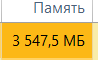


Разбейте выборку bagOfWords на две части: обучающую (строки до 50000) и проверочную (строки >= 50000). Назовите их bagOfWordsTrain и bagOfWordsTest

In [127]:
bagOfWordsTrain = bagOfWords[:int(bagOfWords.shape[0] / 2), ]
bagOfWordsTest = bagOfWords[int(bagOfWords.shape[0] / 2):bagOfWords.shape[0], :]
train = data_copy['Sentiment'].loc[0:data_copy.shape[0] / 2 - 1, ]
test = data_copy['Sentiment'].loc[data.shape[0] / 2:data.shape[0], ]

Сконструируйте машину опорных векторов svm.LinearSVC с параметрами C=1, fit_intercept=False и присвойте ее переменной SVM.

Натренируйте ее на обучающей выборке и с помощью метода .score(x,y) вычислите процент правильных предсказаний для тестовой выборки.

In [128]:
SVM = svm.LinearSVC(C=1, fit_intercept=False)
SVM.fit(bagOfWordsTest, test)
print(SVM.score(bagOfWordsTrain, train))

0.9121


C:\Users\Павел\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Подберите важность суммы нарушений C, чтобы SVM работала лучше всего

In [129]:
SVM = svm.LinearSVC(C=0.005, fit_intercept=False)
SVM.fit(bagOfWordsTest, test)
print(SVM.score(bagOfWordsTrain, train))

0.92716


Выведите на экран 20 слов, которые больше всего голосуют за позитивность отзыва и 20 — за негативность вместе с соответствующими им коэффициентами натренированной линейной функции:
```python
ind = np.argsort(SVM.coef_[0])
for i in range(20):
    print(SVM.coef_[0][ind[i]], vocabulary[ind[i]])
print("\n")
for i in range(20):
    print(SVM.coef_[0][ind[-i-1]], vocabulary[ind[-i-1]]) 
```

In [130]:
ind = np.argsort(SVM.coef_[0])
for i in range(20):
    print(SVM.coef_[0][ind[i]], vocabulary[ind[i]])
print("\n")
for i in range(20):
    print(SVM.coef_[0][ind[-i-1]], vocabulary[ind[-i-1]]) 

-0.31373126651086686 скучный
-0.2839208358570525 увы
-0.2510574910149189 скучно
-0.23913490390673342 разочарование
-0.21541735835181924 бред
-0.20839611636726824 ужасно
-0.2021897078738659 разочарован
-0.1950915864379243 обидно
-0.1899859063318288 единственное
-0.189378959164495 непонятно
-0.18882046941968247 сожалению
-0.1883526967218716 пальца
-0.18750901294794453 тратить
-0.18630219701154568 убого
-0.18534654245383728 слабый
-0.18378348609092401 понимаю
-0.1781221967951009 бездарно
-0.17332320804044823 худших
-0.1696428773538098 слабо
-0.16806811771542882 никакая


0.21349727277848757 дыхании
0.21083230180750412 отличный
0.18559812692938965 потрясающий
0.18450053779426395 фильм
0.17767135647012552 идеально
0.17592199747348627 приятно
0.17076395330933725 мультфильм
0.1703868148815184 замечательный
0.16466325976639895 отличное
0.1616805445313102 превосходно
0.1584624071395526 отлично
0.156562402491729 великолепен
0.153288333871038 потрясающе
0.15295973884435574 отличная
0.152251281860

Какой коэффициент соответствует словам: 'критика', 'странно', 'понимаю', 'деньги', 'даже' и еще 5 ваших слов по выбору. За что они голосуют: позитивность или негативность отзыва?

In [131]:
print(SVM.coef_[0][ind[vocabulary.index('критика')]], 'критика', 'негативность')
print(SVM.coef_[0][ind[vocabulary.index('странно')]], 'странно', 'позитивность')
print(SVM.coef_[0][ind[vocabulary.index('понимаю')]], 'понимаю', 'позитивность')
print(SVM.coef_[0][ind[vocabulary.index('деньги')]], 'деньги', 'негативность')
#print(SVM.coef_[0][ind[vocabulary.index('даже')]], 'даже', 'негативность')
print(SVM.coef_[0][ind[vocabulary.index('обидно')]], 'обидно', 'негативность')
print(SVM.coef_[0][ind[vocabulary.index('юмором')]], 'юмором', 'позитивность')
print(SVM.coef_[0][ind[vocabulary.index('хороший')]], 'хороший', 'позитивность')
print(SVM.coef_[0][ind[vocabulary.index('бред')]], 'бред', 'негативность')
print(SVM.coef_[0][ind[vocabulary.index('непонятно')]], 'непонятно', 'негативность')
print(SVM.coef_[0][ind[vocabulary.index('фильм')]], 'фильм', 'позитивность')

-0.006681234952576162 критика негативность
0.018581084146851962 странно позитивность
0.005513373236099573 понимаю позитивность
-0.017585086152416468 деньги негативность
6.329492471744518e-05 обидно негативность
0.08131498041333363 юмором позитивность
0.035680158300336155 хороший позитивность
-0.03618822700399585 бред негативность
-0.0009292471796346113 непонятно негативность
0.031026162696104365 фильм позитивность


Вычислите выступы, найдите и выведете на экран отзывы с минимальным и максимальным выступом, величину выступа, величину предсказания и сентиментность отзыва. Объясните в комментариях, почему найденный отзыв имеет такой маленький выступ, а другой найденный — такой большой:
```python
prediction = SVM.decision_function(bagOfWordsTest)
margins = np.multiply(prediction, data.loc[50000:]['Sentiment'].as_matrix())
ind = np.argsort(margins)
i = ind[-1] + 50000
print('Величина выступа = ', margins[ind[-1]])
print('Величина предсказания = ', prediction[ind[-1]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
print("\n")
i = ind[0] + 50000
print('Величина выступа = ', margins[ind[0]])
print('Величина предсказания = ', prediction[ind[0]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
```

Для объяснения отступов вам возможно пригодится код, который печатает коэффициенты w<sub>i</sub> линейной функции, значения соответствующих признаков и соответствующие слова. И все это делается в порядке убывания модуля произведения w<sub>i</sub>x<sub>i</sub>:
```python
k = ind[0]
ind2 = np.argsort(np.abs(np.multiply(SVM.coef_[0], bagOfWordsTest[k].todense()))).reshape(-1,1)
s = 0
for i in range((bagOfWordsTest[k]!=0).sum()):
    ii = ind2[-i-1].item()
    print('wi='+str(SVM.coef_[0][ii]), 'xi='+str(bagOfWordsTest[k,ii]),  vocabulary[ii])
    s += SVM.coef_[0][ii]*bagOfWordsTest[k,ii]
print('Проверка:',s) 
```

In [132]:
prediction = SVM.decision_function(bagOfWordsTest)
margins = np.multiply(prediction, data.loc[50000:]['Sentiment']).to_numpy()
ind = np.argsort(margins)
i = ind[-1] + 50000
print('Величина выступа = ', margins[ind[-1]])
print('Величина предсказания = ', prediction[ind[-1]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
print("\n")
i = ind[0] + 50000
print('Величина выступа = ', margins[ind[0]])
print('Величина предсказания = ', prediction[ind[0]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])

Величина выступа =  6.187152087755379
Величина предсказания =  6.187152087755379
Сентиментность отзыва =  1


Мне не очень нравятся фильмы на тему спорта, будь то волейбол, футбол или бокс, но многие картины, вышедшие за последние десять лет, начинают радовать. Сначала понравился «Али» Майкла Манна, иствудовская «Малышка на миллион», тяжёлый, но великолепный «Нокдаун» от Рона Ховарда, затем очень впечатлил «Рестлер» Аронофски, дополнила эту общую тему семьи и спорта картина Дэвида Расселла «Боец», а сейчас вопреки всем законам, очень порадовал фильм Гэвина О`Коннора «Воин». Не говорю, что он лучший, тем более есть такие фильмы как «Рокки», но именно «Warrior» увлёк и зацепил, заставив сто сорок минут сидеть, не отвлекаясь, переживая за героев картины. Именно переживая, так как фильм отлично передаёт атмосферу и напряжение в отношениях главных персонажей, которые получились очень живыми и естественными, поэтому было очень интересно наблюдать за ходом их истории. По сравнению с другими с

In [133]:
k = ind[-1]
ind2 = np.argsort(np.abs(np.multiply(SVM.coef_[0], bagOfWordsTest[k].todense()))).reshape(-1,1)
s = 0
for i in range((bagOfWordsTest[k]!=0).sum()):
    ii = ind2[-i-1].item()
    print('wi='+str(SVM.coef_[0][ii]), 'xi='+str(bagOfWordsTest[k,ii]),  vocabulary[ii])
    s += SVM.coef_[0][ii]*bagOfWordsTest[k,ii]
print('Проверка:',s) 

wi=0.18450053779426395 xi=1 фильм
wi=0.1584624071395526 xi=1 отлично
wi=0.1461932329281879 xi=1 радовать
wi=0.14208766218061744 xi=1 спасибо
wi=0.1386473882200416 xi=1 великолепный
wi=0.12570374732028564 xi=1 хороший
wi=0.12222737739127984 xi=1 каждый
wi=0.11969305182770401 xi=1 неожиданно
wi=0.11939953039327392 xi=1 это
wi=0.11848550000948566 xi=1 замечательно
wi=0.11775569256358003 xi=1 важно
wi=0.11514481979255609 xi=1 очень
wi=0.11155082914189782 xi=1 именно
wi=-0.1105267351506252 xi=1 спорю
wi=0.1082435842203516 xi=1 понравился
wi=0.10755572436115746 xi=1 достоин
wi=0.10009799383784401 xi=1 заставляя
wi=0.09986093035217083 xi=1 особенно
wi=-0.09915216543440045 xi=1 слишком
wi=0.09763681411313738 xi=1 атмосферу
wi=0.09680424534451901 xi=1 показывает
wi=0.09573583747839158 xi=1 придираться
wi=0.09021254696770203 xi=1 обязательно
wi=0.08796103621989491 xi=1 вернулся
wi=-0.08790579873134939 xi=1 какие
wi=0.08465901529015336 xi=1 всем
wi=0.08377432291271245 xi=1 легко
wi=0.082525270147

wi=-0.0004263343008145669 xi=1 сталкивается
wi=0.00040075420354036736 xi=1 младшему
wi=-0.000374156628227582 xi=1 большой
wi=-0.00036654949509235966 xi=1 рестлер
wi=-0.0003581844903624614 xi=1 физическую
wi=-0.00025027933333449077 xi=1 физики
wi=0.00015003150640680214 xi=1 утверждая
wi=0.0001433501835402697 xi=1 развиваться
wi=1.4790327929351053e-05 xi=1 фильма
Проверка: 6.187152087755373


In [134]:
#У первого большой отступ из-за большого количеcтва положительных слов

In [135]:
k = ind[0]
ind2 = np.argsort(np.abs(np.multiply(SVM.coef_[0], bagOfWordsTest[k].todense()))).reshape(-1,1)
s = 0
for i in range((bagOfWordsTest[k]!=0).sum()):
    ii = ind2[-i-1].item()
    print('wi='+str(SVM.coef_[0][ii]), 'xi='+str(bagOfWordsTest[k,ii]),  vocabulary[ii])
    s += SVM.coef_[0][ii]*bagOfWordsTest[k,ii]
print('Проверка:',s) 

wi=0.21349727277848757 xi=1 дыхании
wi=0.18450053779426395 xi=1 фильм
wi=0.12502727512222103 xi=1 немного
wi=0.12222737739127984 xi=1 каждый
wi=0.11939953039327392 xi=1 это
wi=0.1154545705882086 xi=1 главное
wi=-0.09934477999612991 xi=1 ожидала
wi=-0.09466236525173811 xi=1 должно
wi=0.09082250023793678 xi=1 стоит
wi=0.08465901529015336 xi=1 всем
wi=0.08293263190813606 xi=1 чувствуется
wi=0.07294975364102126 xi=1 поразил
wi=0.0652882973484896 xi=1 самом
wi=0.06307871071049521 xi=1 удивил
wi=-0.06180508451896305 xi=1 плохого
wi=-0.0607217179612029 xi=1 решила
wi=-0.055701313446765016 xi=1 деле
wi=0.052555705732146 xi=1 напряжение
wi=0.051346594319621824 xi=1 родители
wi=0.045852094277687716 xi=1 правда
wi=-0.045565498894619194 xi=1 страшно
wi=0.043079409225516764 xi=1 думаю
wi=-0.04267136500418605 xi=1 игру
wi=0.04202438327845102 xi=1 нравятся
wi=0.04137075327660637 xi=1 думала
wi=-0.040063195232092653 xi=1 событиях
wi=0.03915516429546137 xi=1 честно
wi=0.038623910993948504 xi=1 люди
wi=

In [136]:
#У второго не так много положительных слов и много негативных

Нормализуйте признаки перед разбиением выборки на Train и Test так, чтобы вместо 0/1 стояли частоты употребления слов, деленные на длину отзыва. Подберите наилучшую константу C и опишите, как изменятся отзывы с минимальным и максимальным выступом? Что лучше: не нормализованные или нормализованные признаки? Почему?

Нужно установить binary = False в CountVectorizer и добавить после fit_transform
```python
bagOfWords = preprocessing.normalize(bagOfWords, norm='l1')
```

In [137]:
text_creature = feature_extraction.text.CountVectorizer(analyzer='word', tokenizer=None, preprocessor=None, stop_words=None, 
                                                max_features=50000, binary=False)
bagOfWords = text_creature.fit_transform(data_copy['Text'])
bagOfWords = preprocessing.normalize(bagOfWords, norm='l1')
vocabulary = text_creature.get_feature_names()

C:\Users\Павел\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [164]:
bagOfWordsTrain = bagOfWords[:int(bagOfWords.shape[0] / 2), ]
bagOfWordsTest = bagOfWords[int(bagOfWords.shape[0] / 2):bagOfWords.shape[0], :]
train = data_copy['Sentiment'].loc[0:data_copy.shape[0] / 2 - 1, ]
test = data_copy['Sentiment'].loc[data.shape[0] / 2:data.shape[0], ]

In [165]:
SVM = svm.LinearSVC(C=100, fit_intercept=False)
SVM.fit(bagOfWordsTest, test)
print(SVM.score(bagOfWordsTrain, train))

0.92612


In [166]:
prediction = SVM.decision_function(bagOfWordsTest)
margins = np.multiply(prediction, data.loc[50000:]['Sentiment']).to_numpy()
ind = np.argsort(margins)
i = ind[-1] + 50000
print('Величина выступа = ', margins[ind[-1]])
print('Величина предсказания = ', prediction[ind[-1]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])
print("\n")
i = ind[0] + 50000
print('Величина выступа = ', margins[ind[0]])
print('Величина предсказания = ', prediction[ind[0]])
print('Сентиментность отзыва = ', data.loc[i,'Sentiment'])
print('\n')
print(data.loc[i,'Text'])

Величина выступа =  7.206306688658183
Величина предсказания =  7.206306688658183
Сентиментность отзыва =  1


Фильм просто класс! Один из лучших ужастиков! Не уступает японским фильмам ужасов. Отлично передана атмасфера игры. Музыка отличная. Всё на высшем уровне! Только конец смазаный получился. Советую всем посмотреть! !


Величина выступа =  -1.205575540438188
Величина предсказания =  1.205575540438188
Сентиментность отзыва =  -1


Я очень много читала об этом фильме и благодаря очень хорошим отзывам решила его посмотреть. Фильм старый, некую изюминку придает черно-белый цвет. Именно это меня зацепило с самого начала. Отдельного внимания заслуживает игра актеров. Здесь всё было замечательно. Особенно Энтони Пэркинс умело передал образ своего героя, и благодаря этому концовка была более красочной и неожиданной. Но я не увидела в этом фильме то, чего очень хотела, а именно жанра: ужасы, триллер. По моему мнению это скорее детектив, хотя и с довольно не обычной концовкой. Именно поэтом

In [167]:
#Положительный отзыв не содержательный, отрицательный отзыв тоже не особо содержательный и в нем плохо выделены 
#отрицательные слова

In [163]:
#Ненормализованные лучше, так как более содержательные и из них можно выделить больше положительных и отрицательных слов